In [1]:
import numpy as np
import scipy
import scipy.io
import csv
import sklearn
import sklearn.feature_extraction
import sklearn.preprocessing
import pandas as pd

import math
import random

spam = scipy.io.loadmat("./dist/spam_data.mat")
census_train = csv.DictReader(open("./census_training_data.csv"))
census_test = csv.DictReader(open("./census_test_data.csv"))
titanic_train = csv.DictReader(open("./titanic_training_data.csv"))
titanic_test = csv.DictReader(open("./titanic_testing_data.csv"))

def dictReaderToDictList(obj):
    arrayDicts = []
    for row in obj:
        arrayDicts.append(row)
    return arrayDicts

def findMostCommonValue(dictVectorized):
    listFeatureModes = []
    for featureIndex in range(len(dictVectorized[0])):
        temp = dict()
        for dataIndex in range(len(dictVectorized)):
            featureValue = dictVectorized[dataIndex][featureIndex]
            if featureValue not in temp:
                temp[featureValue] = 0
            temp[featureValue] += 1
        maxFeatureValue = -1
        maxFeatureKey = -1
        for k,v in temp.items():
            if v > maxFeatureValue or maxFeatureKey == -1:
                maxFeatureValue = v
                maxFeatureKey = k
        listFeatureModes.append(maxFeatureKey)
    return listFeatureModes

logging = False

def logprint(message):
    if logging:
        print(message)
    
test = np.array([[0, 0, 1], [0, 0, 1], [2, 1, 0]])
print(len(test[0]))
print(findMostCommonValue(test))

3
[0, 0, 1]


In [2]:
"""

spam = scipy.io.loadmat("./dist/spam_data.mat")
census_train = csv.DictReader(open("./census_training_data.csv"))
census_test = csv.DictReader(open("./census_test_data.csv"))
titanic_train = csv.DictReader(open("./titanic_training_data.csv"))
titanic_test = csv.DictReader(open("./titanic_testing_data.csv"))

arrayDictCensusTrain = dictReaderToDictList(census_train)
print(arrayDictCensusTrain[567])

"""

{'hours-per-week': '44', 'sex': 'Male', 'race': 'White', 'relationship': 'Husband', 'label': '1', 'marital-status': 'Married-civ-spouse', 'workclass': 'Private', 'education': 'Assoc-acdm', 'fnlwgt': '155489', 'native-country': 'United-States', 'capital-gain': '0', 'capital-loss': '0', 'age': '46', 'education-num': '12', 'occupation': 'Craft-repair'}


In [2]:
"""

spam = scipy.io.loadmat("./dist/spam_data.mat")
census_train = csv.DictReader(open("./census_training_data.csv"))
census_test = csv.DictReader(open("./census_test_data.csv"))
titanic_train = csv.DictReader(open("./titanic_training_data.csv"))
titanic_test = csv.DictReader(open("./titanic_testing_data.csv"))

census_vec = sklearn.feature_extraction.DictVectorizer(sparse=False)
census_vec.fit(census_train)

print(census_vec)

randTest = {'label': '0', 'hours-per-week': '50', 'education-num': '5', 'occupation': 'Other-service', 'marital-status': 'Never-married', 'relationship': 'Not-in-family', 'native-country': 'United-States', 'sex': 'Male', 'age': '59', 'workclass': 'Private', 'fnlwgt': '307423', 'race': 'Black', 'education': '9th', 'capital-loss': '0', 'capital-gain': '0'}
otherTest = {'label': '0', 'hours-per-week': '45', 'education-num': '12', 'occupation': 'Sales', 'marital-status': 'Married-civ-spouse', 'relationship': 'Husband', 'native-country': 'United-States', 'sex': 'Male', 'age': '51', 'workclass': 'Without-pay', 'fnlwgt': '124963', 'race': 'White', 'education': 'Assoc-acdm', 'capital-loss': '0', 'capital-gain': '0'}

temp = census_vec.transform(randTest)

print(temp)
print(len(temp[0]))
print(census_vec.transform(otherTest))

"""

"""
census_train = csv.DictReader(open("./census_training_data.csv"))
processed_census_train = []
i = 0
for row in census_train:
    if i >= 3: break
    i += 1
    processed_census_train.append(vec.transform(row))
"""

#np.savetxt("preprocessed_census_train.csv", processed_census_train, fmt="%i,%i", delimiter=",", header="Id,Category")

DictVectorizer(dtype=<class 'numpy.float64'>, separator='=', sort=True,
        sparse=False)
[[ 0.  0.  0. ...,  0.  0.  0.]]
22267
[[ 0.  0.  0. ...,  0.  0.  1.]]


'\ncensus_train = csv.DictReader(open("./census_training_data.csv"))\nprocessed_census_train = []\ni = 0\nfor row in census_train:\n    if i >= 3: break\n    i += 1\n    processed_census_train.append(vec.transform(row))\n'

In [2]:
f=pd.read_csv("./census_training_data.csv")
keep_census_col = [
            'age',
            'workclass',
            'fnlwgt',
            'education',
            'education-num',
            'marital-status',
            'occupation',
            'relationship',
            'race',
            'sex',
            'capital-gain',
            'capital-loss',
            'hours-per-week',
            'native-country'
           ]
new_f = f[keep_census_col]

census_train_labels = f['label'].tolist()

def collateDataFrame(frame):
    rows = -1
    results = []
    for columnName, dictColumnData in frame.items():
        if rows == -1:
            rows = len(dictColumnData)
            results = [{} for _ in range(rows)]
        for index, value in dictColumnData.items():
            results[index][columnName] = value
    return results      
        
census_train_csv = collateDataFrame(new_f)

spam_train_data = spam["training_data"]
spam_train_labels = spam["training_labels"][0]

spam_test_data = spam["test_data"]

print(spam)

#new_f.to_csv("newFile.csv", index=False)

#--------------------------------

f=pd.read_csv("./census_test_data.csv")

new_f = f[keep_census_col]
census_test_csv = collateDataFrame(new_f)

print(census_test_csv[100])

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Thu Mar 16 00:54:38 2017', '__version__': '1.0', 'training_labels': array([[1, 1, 1, ..., 0, 0, 0]], dtype=int64), '__globals__': [], 'test_data': array([[ 0.,  0.,  0., ...,  2.,  1.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.]]), 'training_data': array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  4.,  0.,  0.],
       [ 0.,  0.,  0., ...,  2.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  2.]])}
{'hours-per-week': 40, 'occupation': 'Exec-managerial', 'education': 'Bachelors', 'age': 55, 'workclass': 'Private', 'sex': 'Male', 'native-country': 'United-States', 'relationship': 'Husband', 'capital-gain': 0,

In [31]:
g=pd.read_csv("./titanic_training_data.csv")
print(g.keys())
keep_titanic_col = [
            'pclass',
            'age',
            'sex',
            'sibsp',
            'parch',
            #'ticket',
            'fare',
            #'cabin',
            'embarked'
           ]
new_g = g[keep_titanic_col]

titanic_train_labels_pre = g['survived'].tolist()  
titanic_train_labels = []    

titanic_train_csv = collateDataFrame(new_g)

print(len(titanic_train_csv))
print(titanic_train_csv[567])

print(g["cabin"])

def dataDistance(data1, data2):
    dist = 0
    for k,v in data1.items():
        if data1[k] != data2[k]:
            dist += 1
    return dist

import operator

def findNearestNeighbors(data, dataPoint, desiredNum = 50):
    dataRankedByDist = dict()
    for i in range(len(data)):
        otherDataPoint = data[i]
        dataRankedByDist[i] = dataDistance(dataPoint, otherDataPoint)
    sorted_x = sorted(dataRankedByDist.items(), key=operator.itemgetter(1))
    desired = sorted_x[0:desiredNum]
    return [pair[0] for pair in desired]

print(findNearestNeighbors(titanic_train_csv, titanic_train_csv[567], 50))

def fillInMissingData(data, dataPoint):
    copy = dict(dataPoint)
    listIndicesNN = findNearestNeighbors(data, dataPoint, 50)
    for feature in dataPoint.keys():
        candidates = dict()
        for dataIndex in listIndicesNN:
            sample = data[dataIndex][feature]
            #print(sample)
            if not pd.isnull(sample):
                if sample not in candidates:
                    candidates[sample] = 0
                candidates[sample] += 1
        maxLabel = -1
        maxLabelCount = -1
        for k,v in candidates.items():
            if maxLabel == -1 or v > maxLabelCount:
                maxLabel = k
                maxLabelCount = v
        copy[feature] = maxLabel
    return copy

print(fillInMissingData(titanic_train_csv, titanic_train_csv[567]))

print([label for label in titanic_train_labels_pre if np.isnan(label)])
    
titanic_train_imputed_data = []
for i in range(len(titanic_train_csv)):
    if np.isnan(titanic_train_labels_pre[i]): continue
    imputed = fillInMissingData(titanic_train_csv, titanic_train_csv[i])
    titanic_train_imputed_data.append(imputed)
    titanic_train_labels.append(titanic_train_labels_pre[i])

print(titanic_train_imputed_data[667])

#--------------------------------

f=pd.read_csv("./titanic_testing_data.csv")

new_f = f[keep_titanic_col]
titanic_test_csv = collateDataFrame(new_f)

print(titanic_test_csv[100])
print(len(titanic_test_csv))


Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'ticket', 'fare',
       'cabin', 'embarked'],
      dtype='object')
1000
{'sibsp': 0.0, 'pclass': 2.0, 'parch': 0.0, 'fare': 33.0, 'embarked': 'S', 'sex': 'female', 'age': nan}
0          NaN
1          NaN
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
7          NaN
8          NaN
9          E45
10         NaN
11         NaN
12         NaN
13         NaN
14     B58 B60
15         B30
16         NaN
17         NaN
18         E46
19         NaN
20         NaN
21         NaN
22         NaN
23         NaN
24         NaN
25         D20
26          F2
27         NaN
28         E25
29         NaN
        ...   
970        NaN
971        NaN
972        NaN
973        NaN
974        E17
975        D30
976        D50
977        NaN
978        A21
979        NaN
980        NaN
981         G6
982        NaN
983    B96 B98
984        NaN
985        NaN
986        NaN
987        NaN
988        NaN
989        

In [32]:
census_vec = sklearn.feature_extraction.DictVectorizer(sparse=False)
census_vec.fit(census_train_csv)

logprint(census_vec)

randTest = {'marital-status': 'Married-civ-spouse', 'race': 'White', 'hours-per-week': 44, 'education': 'Assoc-acdm', 'education-num': 12, 'age': 46, 'capital-gain': 0, 'occupation': 'Craft-repair', 'fnlwgt': 155489, 'workclass': 'Private', 'relationship': 'Husband', 'sex': 'Male', 'capital-loss': 0, 'native-country': 'United-States'}
otherTest = {'marital-status': 'Married-civ-spouse', 'race': 'White', 'hours-per-week': 40, 'education': 'Some-college', 'education-num': 10, 'age': 34, 'capital-gain': 0, 'occupation': 'Handlers-cleaners', 'fnlwgt': 207668, 'workclass': 'Private', 'relationship': 'Husband', 'sex': 'Male', 'capital-loss': 1887, 'native-country': 'United-States'}

temp = census_vec.transform(randTest)

print(temp)
print(len(temp[0]))
print(census_vec.transform(otherTest))

census_features = census_vec.vocabulary_

census_features = sorted(census_features.items(), key=operator.itemgetter(1))
print(census_features)

[[  4.60000000e+01   0.00000000e+00   0.00000000e+00   1.20000000e+01
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   1.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    1.55489000e+05   4.40000000e+01   0.00000000e+00   0.00000000e+00
    1.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00  

In [33]:
titanic_vec = sklearn.feature_extraction.DictVectorizer(sparse=False)
titanic_vec.fit(titanic_train_imputed_data)

print(titanic_vec)

randTest = {'pclass': 2.0, 'age': 28.0, 'sibsp': 0.0, 'parch': 0.0, 'fare': 13.0, 'sex': 'female', 'embarked': 'S'}
otherTest = {'pclass': 3.0, 'age': 3.0, 'sibsp': 1.0, 'parch': 1.0, 'fare': 21.074999999999999, 'sex': 'female', 'embarked': 'S'}
temp = titanic_vec.transform(randTest)

print(temp)
print(len(temp[0]))
print(titanic_vec.transform(otherTest))

titanic_featrues = titanic_vec.vocabulary_

titanic_featrues = sorted(titanic_featrues.items(), key=operator.itemgetter(1))
print(titanic_featrues)

DictVectorizer(dtype=<class 'numpy.float64'>, separator='=', sort=True,
        sparse=False)
[[ 28.   0.   0.   1.  13.   0.   2.   1.   0.   0.]]
10
[[  3.      0.      0.      1.     21.075   1.      3.      1.      0.      1.   ]]
[('age', 0), ('embarked=C', 1), ('embarked=Q', 2), ('embarked=S', 3), ('fare', 4), ('parch', 5), ('pclass', 6), ('sex=female', 7), ('sex=male', 8), ('sibsp', 9)]


In [37]:
class Node:
    def __init__(self):
        self.split_rule = None
        self.left = None
        self.right = None
        self.label = None

def nodeDecision(node, data):
    if node.split_rule != None:
        logprint("Feature " + str(node.split_rule[0]) + ", split across: " + str(node.split_rule[1]) + 
                 ", found " + str(data[node.split_rule[0]]))
        if data[node.split_rule[0]] > node.split_rule[1]:
            #logprint("Moving to right...")
            return nodeDecision(node.right, data)
        else:
            #logprint("Moving to left...")
            return nodeDecision(node.left, data)
    else:
        logprint("Ended at the decision: ")
        logprint(str(node.label))
        return node.label
    
def printWholeTree(node, k = 0):
    if node.split_rule != None:
        logprint("Level " + str(k) + ", feature " + str(node.split_rule[0]) + ", split across: " + str(node.split_rule[1]))
        printWholeTree(node.left, k+1)
        printWholeTree(node.right, k+1)
    else:
        logprint("Level " + str(k) + ", ended at the decision: ")
        logprint(str(node.label))
        return node.label

In [7]:
# Where left and right are maps from labels -> frequencies
def impurity(left, right):
    leftEn = 0
    rightEn = 0
    leftLen = 0
    rightLen = 0
    
    for k,v in left.items():
        leftLen += v
    for k,v in right.items():
        rightLen += v
    if leftLen > 0:
        for k,v in left.items():
            p_c = v / leftLen
            if v == 0: continue
            leftEn -= p_c * np.log2(p_c)
    if rightLen > 0:
        for k,v in right.items():
            p_c = v / rightLen
            if v == 0: continue
            rightEn -= p_c * np.log2(p_c)

    weightSum = leftLen * leftEn + rightLen * rightEn
    return weightSum / (leftLen + rightLen)

In [16]:
# Return None if the data is essentially pure across 
def segmenter(data, labels, skipFeatures=[], checkAllSplits=False):
    uniqueLabels = set(labels)
    minBadness = 100000
    maxLabelIndex = -1
    maxLabelSplitDir = -1
    
    #TODO: Confirm type of data and figure out type of labels
    
    if len(labels) == 0:
        return None
    
    firstLabel = labels[0]
    pure = True
    for label in labels:
        if firstLabel != label:
            pure = False
            break
    if pure:
        return None
    
    featuresEqual = True
    for featureIndex in range(len(data[0])):
        if featureIndex in skipFeatures: continue
        equalNum = data[0][featureIndex]
        equal = True
        for dataIndex in range(len(data)):
            equal = equal and (equalNum == data[dataIndex][featureIndex]) 
        if not equal: 
            featuresEqual = False
            break
        featuresEqual = featuresEqual and equal
    if featuresEqual:
        return "guess"
    
    for featureIndex in range(len(data[0])):
        #splits = [] #With binary variables, a 0 split 
                        #is equivalent to a 1 split 
        if featureIndex in skipFeatures:
            continue
            
        splits = None    
            
        if not checkAllSplits:
            minSplit = None
            maxSplit = None
            for dataIndex in range(len(data)):
                if maxSplit == None or data[dataIndex][featureIndex] > maxSplit:
                    maxSplit = data[dataIndex][featureIndex]
                if minSplit == None or data[dataIndex][featureIndex] < minSplit:
                    minSplit = data[dataIndex][featureIndex]
            splits = [(minSplit + maxSplit) / 2.0] 
        else:
            splits = []
            for dataIndex in range(len(data)):
                if data[dataIndex][featureIndex] not in splits:
                    splits.append(data[dataIndex][featureIndex])
                    splits.append(data[dataIndex][featureIndex] + 0.5)
        
        for split in splits:
            
            left = dict()
            right = dict()
            for uniqueLabel in uniqueLabels:
                left[uniqueLabel] = 0
                right[uniqueLabel] = 0
            
            """
            for dataIndex in range(len(data)):
                if data[dataIndex][labelIndex] != split:
                    for labelIndex2 in range(len(labels)):
                        left[labelIndex2] += 1
                else:
                    for labelIndex2 in range(len(labels)):
                        right[labelIndex2] += 1
            """
            
            for dataIndex in range(len(data)):
                if data[dataIndex][featureIndex] <= split:
                    left[labels[dataIndex]] += 1
                else:
                    right[labels[dataIndex]] += 1
                    
            badness = impurity(left, right)
            
            #print(str(featureIndex) + " " + str(split) + " " + str(badness))
            #print(str(left["a"]) + " " + str(left["b"]))
            #print(str(right["a"]) + " " + str(right["b"]))
            #print(badness)
            #print("----------")
            
            
            if badness < minBadness or maxLabelIndex == -1:
                minBadness = badness
                maxLabelIndex = featureIndex
                maxLabelSplitDir = split
                
    """
    print("Min entropy: " + str(minBadness))
    if minBadness <= 0:
        print(data)
        print(str(maxLabelIndex) + " " + str(maxLabelSplitDir))
        left = dict()
        right = dict()
        for uniqueLabel in uniqueLabels:
            left[uniqueLabel] = 0
            right[uniqueLabel] = 0
        for dataIndex in range(len(data)):
            print(data[dataIndex][maxLabelIndex])
            if data[dataIndex][maxLabelIndex] <= maxLabelSplitDir:
                left[labels[dataIndex]] += 1
            else:
                right[labels[dataIndex]] += 1
        print(":")
        print(left)
        print(right)
        print("----------")
    """
    
    return (maxLabelIndex, maxLabelSplitDir)

test = np.array([
        [1,1,0,1],
        [1,1,0,0],
        [1,1,1,1],
        [1,1,1,1],
        [1,1,0,1],
        [1,1,1,1],
        [1,1,0,1],
        [1,1,0,0],
        [1,1,1,1],
        [1,1,1,1],
        [1,1,0,1],
        [1,1,1,1],
        [1,1,1,1],
        [1,1,1,1]
    ])
print(segmenter(test, ["a","a","b","a","b","a","b","b","b","a","a","b","a","a"]))

test = np.array([
        [1,1,0,1],
        [1,0,1,1],
        [0,1,1,1],
        [1,1,1,0],
        [1,1,0,1],
        [1,1,0,1],
        [1,1,0,1],
        [1,1,0,1]
    ])
print(segmenter(test, ["a","a","a","a","b","b","b","b"]))

test = np.array([
        [1,1,1,1],
        [1,1,1,1],
        [1,1,1,1],
        [1,1,1,1],
    ])
print(segmenter(test, ["a","a","a","b"]))

(2, 0.5)
(2, 0.5)
guess


In [9]:
#initialNode = Node()

def train(node, data, labels, levels=3, randomForest=False, checkAllSplits=False):
    logprint("---------------")
    
    if len(labels) <= 0: return
    
    uniqueLabels = set(labels)
    
    if levels <= 0 or len(data) <= 3:
        logprint("A guessing rule was found for data at the lowest depth or for a small number of nodes: ")
        labelsByCount = dict()
        for label in uniqueLabels:
            labelsByCount[label] = 0
        for label in labels:
            labelsByCount[label] += 1
        maxLabel = None
        maxLabelScore = -1;
        for label in uniqueLabels:
            if labelsByCount[label] > maxLabelScore or maxLabel == None:
                maxLabelScore = labelsByCount[label]
                maxLabel = label
        logprint('Decided on majority 1')
        logprint(maxLabel)
        logprint(labelsByCount)
        node.label = maxLabel
        return
    
    labelsByCount = dict()
    for label in uniqueLabels:
        labelsByCount[label] = 0
    for label in labels:
        labelsByCount[label] += 1
    for label in uniqueLabels:
        if labelsByCount[label] / len(labels) >= 0.9:
            logprint('Decided on majority 2')
            logprint(label)
            logprint(labels)
            node.label = label
            return 
        
    decision = None
    if randomForest:
        numFeatures = len(data[0])
        #desiredLenSampleFeatures = int(math.ceil(math.sqrt(numFeatures)))
        desiredLenSampleFeatures = int(numFeatures / 3.0)
        sampleFeatures = []
        while True: #randomly pick m of d features specified in note 16
            randFeature = int(random.random() * numFeatures)
            if randFeature not in sampleFeatures:
                sampleFeatures.append(randFeature)
            if len(sampleFeatures) >= desiredLenSampleFeatures:
                break

        skipFeatures = [i for i in range(numFeatures) if i not in sampleFeatures]    

        decision = segmenter(data, labels, skipFeatures, checkAllSplits)
    else:
        decision = segmenter(data, labels, [], checkAllSplits)

    
    logprint("For data set: ...")
    #print(data)
    logprint("and labels: ")
    logprint(labels)

    if decision != None: #A split rule was found for a non-pure node
        if decision == "guess": #It's a decision for non-separable data: 
            uniqueLabels = set(labels)
            logprint("A guessing rule was found for non-separable data: ")
            labelsByCount = dict()
            for label in uniqueLabels:
                labelsByCount[label] = 0
            for label in labels:
                labelsByCount[label] += 1
            maxLabel = None
            maxLabelScore = -1;
            for label in uniqueLabels:
                if labelsByCount[label] > maxLabelScore or maxLabel == None:
                    maxLabelScore = labelsByCount[label]
                    maxLabel = label
            logprint('Decided on guessing:')
            logprint(maxLabel)
            node.label = maxLabel
        else:
            logprint("A decision rule was found: ")
            logprint(decision)
            node.split_rule = decision
            node.left = Node()
            node.right = Node()
            leftData = []
            rightData = []
            leftLabels = []
            rightLabels = []
            for dataIndex in range(len(data)):
                if data[dataIndex][decision[0]] > decision[1]:
                    rightData.append(data[dataIndex])
                    rightLabels.append(labels[dataIndex])
                else:
                    leftData.append(data[dataIndex])
                    leftLabels.append(labels[dataIndex])
            logprint(str(len(leftData)) + " " + str(len(rightData)))
            leftData = np.array(leftData)
            rightData = np.array(rightData)
            train(node.left, leftData, leftLabels, levels - 1)
            train(node.right, rightData, rightLabels, levels - 1)
    else:
        logprint("No decision was found for a pure node")
        #if len(labels) == 0: return
        print('Decided on pure:')
        print(labels[0])
        node.label = labels[0]
    
def fullTrain(data, labels, levels=3, randomForest=False, checkAllSplits=False):
    initialNode = Node()
    train(initialNode, data, labels, levels, randomForest)
    return initialNode
    
testData = np.array([
        [1,1,0,1],
        [1,1,0,0],
        [1,1,1,1],
        [1,1,1,1],
        [1,1,0,1],
        [1,1,1,1],
        [1,1,0,1],
        [1,1,0,0],
        [1,1,1,1],
        [1,1,1,1],
        [1,1,0,1],
        [1,1,1,1],
        [1,1,1,1],
        [1,1,1,1],
        [0,0,0,0]
    ])
testLabels = np.array(
    ["a","a","b","a","b","a","b","b","b","a","a","b","a","a","c"]
)

initialNode = fullTrain(testData, testLabels, 5)

print(nodeDecision(initialNode, [0,0,0,0]))
print(nodeDecision(initialNode, [1,1,1,1]))

c
a


In [10]:
def randomForestTrain(data, labels, levels = 15, trees = 10): 
    randomForestRoots = []
    for indexTree in range(trees):
        print(indexTree)
        
        copyData = np.array(data)
        #for featureIndex in range(numFeatures):
            #if featureIndex not in sampleFeatures:
                #for dataIndex in range(len(data)):
                    #copyData[dataIndex][featureIndex] = 0
        
        indices = [i for i in range(len(data))]
        chosenIndices = []
        for i in range(int(len(data) * 0.4)):
            randIndex = int(random.random() * len(indices)) 
            chosenIndices.append(indices.pop(randIndex))
        
        copyDataSubset = []
        copyLabels = []
        for chosen in chosenIndices:
            copyDataSubset.append(copyData[chosen])
            copyLabels.append(labels[chosen])
        copyDataSubset = np.array(copyDataSubset)
        
        """
        print(copyDataSubset)
        print(copyLabels)
        print(copyDataSubset[0])
        print("------")
        """
        
        treeRoot = fullTrain(copyDataSubset, copyLabels, levels, True, False)
        
        randomForestRoots.append(treeRoot)
    return randomForestRoots

def randomForestDecide(randomForestRoots, decisionPoint):
    candidates = dict()
    for forestRoot in randomForestRoots:
        prediction = nodeDecision(forestRoot, decisionPoint)
        if prediction not in candidates:
            candidates[prediction] = 0
        candidates[prediction] += 1
    maxLabel = None
    maxLabelValue = -1
    for k,v in candidates.items():
        if maxLabel == None or v > maxLabelValue:
            maxLabel = k
            maxLabelValue = v
    logprint(candidates)
    logprint(maxLabel)
    return maxLabel

In [10]:
"""

listy = [1,2,3]
nparr = list(listy)
nparr[0] = 50;
print(listy)
print(nparr)

"""

[1, 2, 3]
[50, 2, 3]


In [38]:
#Titanic Training/Validation Regular

indices = [i for i in range(len(titanic_train_imputed_data))]
random.shuffle(indices)

copyData = []
copyLabels = []

validationData = []
validationLabels = []

for i in range(900):
    copyData.append(titanic_train_imputed_data[indices[i]])
    copyLabels.append(titanic_train_labels[indices[i]])
for i in range(900,999):
    validationData.append(titanic_train_imputed_data[indices[i]])
    validationLabels.append(titanic_train_labels[indices[i]])
    
#-------------------------

trainingSetTransformed = titanic_vec.transform(copyData)
validSetTransformed = titanic_vec.transform(validationData)

trainedTitanicNode = fullTrain(trainingSetTransformed, copyLabels, 3)

accuracy = 0

logging = True

for i in range(len(validSetTransformed)):
    if i >= 10: logging = False
    transformed = validSetTransformed[i]
    prediction = nodeDecision(trainedTitanicNode, transformed)
    #print(str(prediction) + " " + str(validationLabels[i]))
    if str(prediction) == str(validationLabels[i]):
        accuracy += 1

accuracy /= len(validationLabels)

print(accuracy)

#-------------------------

testSetTransformed = titanic_vec.transform(titanic_test_csv)

results = []

for i in range(len(testSetTransformed)):
    if i >= 10: logging = False
    transformed = testSetTransformed[i]
    prediction = nodeDecision(trainedTitanicNode, transformed)
    #print(str(prediction) + " " + str(validationLabels[i]))
    results.append([i+1, int(prediction)])
    
temp = np.asarray(results)
#temp.tofile("./submission.py")
np.savetxt("titanic_submission.csv", temp, fmt="%i,%i", delimiter=",", header="Id,Category")

#-------

logging = True
printWholeTree(trainedTitanicNode)
logging = False

Feature 7, split across: 0.5, found 0.0
Feature 6, split across: 2.0, found 2.0
Feature 6, split across: 1.5, found 2.0
Ended at the decision: 
0.0
Feature 7, split across: 0.5, found 1.0
Feature 6, split across: 2.0, found 1.0
Ended at the decision: 
1.0
Feature 7, split across: 0.5, found 0.0
Feature 6, split across: 2.0, found 1.0
Feature 6, split across: 1.5, found 1.0
Ended at the decision: 
0.0
Feature 7, split across: 0.5, found 0.0
Feature 6, split across: 2.0, found 1.0
Feature 6, split across: 1.5, found 1.0
Ended at the decision: 
0.0
Feature 7, split across: 0.5, found 0.0
Feature 6, split across: 2.0, found 1.0
Feature 6, split across: 1.5, found 1.0
Ended at the decision: 
0.0
Feature 7, split across: 0.5, found 1.0
Feature 6, split across: 2.0, found 1.0
Ended at the decision: 
1.0
Feature 7, split across: 0.5, found 0.0
Feature 6, split across: 2.0, found 3.0
Feature 4, split across: 34.775, found 8.05
Ended at the decision: 
0.0
Feature 7, split across: 0.5, found 0.0


In [23]:
#Titanic Train/Validation Random Forest

forestRoots = randomForestTrain(trainingSetTransformed, copyLabels, 15, 25)

logging = True

accuracy = 0

for i in range(len(validSetTransformed)):
    if i >= 1: logging = False
    transformed = validSetTransformed[i]
    #prediction = nodeDecision(trainedCensusNode, transformed)
    prediction = randomForestDecide(forestRoots, transformed)
    #print(str(prediction) + " " + str(validationLabels[i]))
    if str(prediction) == str(validationLabels[i]):
        accuracy += 1
        
accuracy /= len(validationLabels)

print(accuracy)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
Feature 7, split across: 0.5, found 1.0
Moving to right...
Feature 6, split across: 2.0, found 1.0
Moving to left...
Ended at the decision: 
1.0
Feature 8, split across: 0.5, found 0.0
Moving to left...
Feature 6, split across: 2.0, found 1.0
Moving to left...
Ended at the decision: 
1.0
Feature 9, split across: 0.5, found 0.0
Moving to left...
Feature 7, split across: 0.5, found 1.0
Moving to right...
Feature 6, split across: 2.0, found 1.0
Moving to left...
Ended at the decision: 
1.0
Feature 8, split across: 0.5, found 0.0
Moving to left...
Feature 6, split across: 2.0, found 1.0
Moving to left...
Ended at the decision: 
1.0
Feature 7, split across: 0.5, found 1.0
Moving to right...
Feature 6, split across: 2.0, found 1.0
Moving to left...
Ended at the decision: 
1.0
Feature 4, split across: 256.1646, found 26.55
Moving to left...
Feature 7, split across: 0.5, found 1.0
Moving to right...
Feature 6, split across: 2.0, 

In [28]:
#Spam Training/Validation Regular

indices = [i for i in range(len(spam_train_data))]
random.shuffle(indices)

copyData = []
copyLabels = []

validationData = []
validationLabels = []

for i in range(23000):
    copyData.append(spam_train_data[indices[i]])
    copyLabels.append(spam_train_labels[indices[i]])
for i in range(22000,23000):
    validationData.append(spam_train_data[indices[i]])
    validationLabels.append(spam_train_labels[indices[i]])
    
trainedSpamNode = fullTrain(copyData, copyLabels, 30, False, False)

accuracy = 0

logging = True
for i in range(len(validationData)):
    if i >= 5: logging = False
    transformed = validationData[i]
    prediction = nodeDecision(trainedSpamNode, transformed)
    logprint(str(prediction) + " " + str(validationLabels[i]))
    if str(prediction) == str(validationLabels[i]):
        accuracy += 1

accuracy /= len(validationLabels)

print(accuracy)

Feature 10, split across: 2.0, found 0.0
Feature 10, split across: 1.0, found 0.0
Feature 10, split across: 0.5, found 0.0
Feature 6, split across: 2.0, found 0.0
Feature 6, split across: 1.0, found 0.0
Feature 6, split across: 0.5, found 0.0
Feature 19, split across: 14.0, found 0.0
Feature 19, split across: 7.0, found 0.0
Feature 19, split across: 3.5, found 0.0
Feature 19, split across: 1.5, found 0.0
Feature 19, split across: 0.5, found 0.0
Feature 28, split across: 44.0, found 4.0
Feature 20, split across: 2.5, found 0.0
Feature 20, split across: 1.0, found 0.0
Feature 20, split across: 0.5, found 0.0
Feature 14, split across: 33.0, found 0.0
Feature 14, split across: 16.5, found 0.0
Feature 3, split across: 9.5, found 0.0
Feature 3, split across: 4.5, found 0.0
Feature 3, split across: 2.0, found 0.0
Feature 3, split across: 1.0, found 0.0
Feature 3, split across: 0.5, found 0.0
Feature 14, split across: 7.5, found 0.0
Feature 5, split across: 3.5, found 0.0
Feature 5, split acro

In [13]:
#--------------------------------

results = []

for i in range(len(spam_test_data)):
    if i >= 10: logging = False
    transformed = spam_test_data[i]
    prediction = nodeDecision(trainedSpamNode, transformed)
    #print(str(prediction) + " " + str(validationLabels[i]))
    results.append([i, int(prediction)])
    
temp = np.asarray(results)
#temp.tofile("./submission.py")
np.savetxt("spam_submission.csv", temp, fmt="%i,%i", delimiter=",", header="Id,Category")

In [39]:
#Spam Training/Validation Random Forest

indices = [i for i in range(len(spam_train_data))]
random.shuffle(indices)

copyData = []
copyLabels = []

validationData = []
validationLabels = []

for i in range(23000):
    copyData.append(spam_train_data[indices[i]])
    copyLabels.append(spam_train_labels[indices[i]])
for i in range(22000,23000):
    validationData.append(spam_train_data[indices[i]])
    validationLabels.append(spam_train_labels[indices[i]])

spamForestRoots = randomForestTrain(copyData, copyLabels, 50, 15)

logging = True

accuracy = 0

for i in range(len(validationData)):
    if i >= 1: logging = False
    transformed = validationData[i]
    #prediction = nodeDecision(trainedCensusNode, transformed)
    prediction = randomForestDecide(spamForestRoots, transformed)
    #print(str(prediction) + " " + str(validationLabels[i]))
    if str(prediction) == str(validationLabels[i]):
        accuracy += 1
        
accuracy /= len(validationLabels)

print(accuracy)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
Feature 10, split across: 2.0, found 0.0
Feature 10, split across: 1.0, found 0.0
Feature 10, split across: 0.5, found 0.0
Feature 6, split across: 2.0, found 0.0
Feature 6, split across: 1.0, found 0.0
Feature 6, split across: 0.5, found 0.0
Feature 15, split across: 6.0, found 0.0
Feature 15, split across: 3.0, found 0.0
Feature 15, split across: 1.5, found 0.0
Feature 15, split across: 0.5, found 0.0
Feature 29, split across: 40.0, found 0.0
Feature 3, split across: 7.0, found 0.0
Feature 3, split across: 3.5, found 0.0
Feature 3, split across: 1.5, found 0.0
Feature 3, split across: 0.5, found 0.0
Feature 20, split across: 1.5, found 0.0
Feature 20, split across: 0.5, found 0.0
Feature 14, split across: 7.0, found 0.0
Feature 28, split across: 25.0, found 0.0
Feature 12, split across: 5.0, found 0.0
Feature 12, split across: 2.5, found 0.0
Feature 28, split across: 12.5, found 0.0
Feature 28, split across: 6.0, found 0.0
Feature 28, split across: 

NameError: name 'k' is not defined

In [40]:
#-----------

def printNode(node):
    print("Feature " + str(node.split_rule[0]) + ", split across: " + str(node.split_rule[1]))
    
for root in spamForestRoots:
    printNode(root)

Feature 10, split across: 2.0
Feature 6, split across: 2.0
Feature 31, split across: 33.5
Feature 26, split across: 101.0
Feature 9, split across: 1.5
Feature 10, split across: 2.0
Feature 0, split across: 3.5
Feature 31, split across: 42.0
Feature 10, split across: 2.0
Feature 10, split across: 2.0
Feature 20, split across: 1.5
Feature 6, split across: 2.0
Feature 10, split across: 2.0
Feature 17, split across: 1.5
Feature 9, split across: 2.5


In [51]:
#Census Train/Validation Normal

indices = [i for i in range(len(census_train_csv))]
random.shuffle(indices)

copyData = []
copyLabels = []

validationData = []
validationLabels = []

for i in range(1000,int(len(census_train_csv) * 0.3)):
    copyData.append(census_train_csv[indices[i]])
    copyLabels.append(census_train_labels[indices[i]])
for i in range(1000):
    validationData.append(census_train_csv[indices[i]])
    validationLabels.append(census_train_labels[indices[i]])
    
trainingSetTransformed = census_vec.transform(copyData)
validSetTransformed = census_vec.transform(validationData)

logprint(trainingSetTransformed)
logprint(census_train_labels[30000:31000])

accuracy = 0

logging = False

for i in range(len(validSetTransformed)):
    transformed = validSetTransformed[i]
    prediction = nodeDecision(trainedCensusNode, transformed)
    #print(str(prediction) + " " + str(validationLabels[i]))
    if str(prediction) == str(validationLabels[i]):
        accuracy += 1

accuracy /= len(validationLabels)

print(accuracy)

#--------

logging = False

for j in range(1,40):

    trainedCensusNode = fullTrain(trainingSetTransformed, copyLabels, j)

    accuracy = 0

    for i in range(len(validSetTransformed)):
        transformed = validSetTransformed[i]
        prediction = nodeDecision(trainedCensusNode, transformed)
        #print(str(prediction) + " " + str(validationLabels[i]))
        if str(prediction) == str(validationLabels[i]):
            accuracy += 1

    accuracy /= len(validationLabels)

    print("Depth: " + str(j) + ", accuracy: " + str(accuracy))
    
    """
    Depth: 1, accuracy: 0.7628333333333334
    Depth: 2, accuracy: 0.7628333333333334
    Depth: 3, accuracy: 0.8241666666666667
    Depth: 4, accuracy: 0.8298333333333333
    Depth: 5, accuracy: 0.8315
    Depth: 6, accuracy: 0.8328333333333333
    Depth: 7, accuracy: 0.8358333333333333
    Depth: 8, accuracy: 0.8398333333333333
    Depth: 9, accuracy: 0.844
    Depth: 10, accuracy: 0.846
    Depth: 11, accuracy: 0.8483333333333334
    Depth: 12, accuracy: 0.8506666666666667
    Depth: 13, accuracy: 0.8606666666666667
    Depth: 14, accuracy: 0.8651666666666666
    Depth: 15, accuracy: 0.8705
    Depth: 16, accuracy: 0.8751666666666666
    Depth: 17, accuracy: 0.8785
    Depth: 18, accuracy: 0.8821666666666667
    Depth: 19, accuracy: 0.8865
    Depth: 20, accuracy: 0.8905
    Depth: 21, accuracy: 0.8955
    Depth: 22, accuracy: 0.8978333333333334
    Depth: 23, accuracy: 0.9021666666666667
    Depth: 24, accuracy: 0.9065
    Depth: 25, accuracy: 0.9088333333333334
    
    """

0.842
Depth: 1, accuracy: 0.763
Depth: 2, accuracy: 0.763


KeyboardInterrupt: 

In [50]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

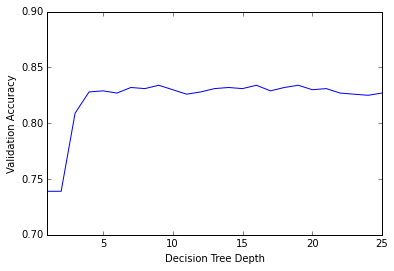

In [57]:
xData = [i for i in range(1,29)]
yData = [0.739, 0.739, 0.809, 0.828, 0.829, 0.827, 0.832, 0.831, 0.834, 0.83, 0.826, 0.828, 0.831, 0.832, 0.831, 0.834, 0.829, 0.832, 0.834, 0.83, 0.831, 0.827, 0.826, 0.825, 0.827, 0.826, 0.826, 0.83]
plt.plot(xData, yData, 'b-')
plt.axis([1, 25, 0.7, 0.9])
plt.xlabel('Decision Tree Depth')
plt.ylabel('Validation Accuracy')
plt.show()

In [34]:
#--------------------------------

testSetTransformed = census_vec.transform(census_test_csv)

results = []

for i in range(len(testSetTransformed)):
    if i >= 10: logging = False
    transformed = testSetTransformed[i]
    prediction = nodeDecision(trainedCensusNode, transformed)
    #print(str(prediction) + " " + str(validationLabels[i]))
    results.append([i+1, int(prediction)])
    
temp = np.asarray(results)
#temp.tofile("./submission.py")
np.savetxt("census_submission.csv", temp, fmt="%i,%i", delimiter=",", header="Id,Category")

In [58]:
#Census Train/Validation Random Forest

censusForestRoots = randomForestTrain(trainingSetTransformed, census_train_labels, 10, 25)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
Feature 10, split across: 2.0, found 0.0
Feature 9, split across: 1.5, found 0.0
Feature 9, split across: 0.5, found 0.0
Feature 21, split across: 1.5, found 40.0
Ended at the decision: 
0
Feature 15, split across: 6.5, found 0.0
Feature 10, split across: 2.0, found 0.0
Feature 10, split across: 1.0, found 0.0
Feature 10, split across: 0.5, found 0.0
Feature 15, split across: 3.0, found 0.0
Feature 15, split across: 1.5, found 0.0
Feature 15, split across: 0.5, found 0.0
Feature 20, split across: 1.5, found 230951.0
Ended at the decision: 
0
Feature 10, split across: 2.0, found 0.0
Feature 10, split across: 1.0, found 0.0
Feature 10, split across: 0.5, found 0.0
Feature 30, split across: 17.5, found 0.0
Feature 5, split across: 2.5, found 0.0
Feature 5, split across: 1.0, found 0.0
Feature 5, split across: 0.5, found 0.0
Feature 15, split across: 6.0, found 0.0
Feature 15, split across: 3.0, found 0.0
Feature 15, split ac

In [59]:
logging = True

accuracy = 0

for i in range(len(validSetTransformed)):
    if i >= 1: logging = False
    transformed = validSetTransformed[i]
    #prediction = nodeDecision(trainedCensusNode, transformed)
    prediction = randomForestDecide(censusForestRoots, transformed)
    #print(str(prediction) + " " + str(validationLabels[i]))
    if str(prediction) == str(validationLabels[i]):
        accuracy += 1
        
accuracy /= len(validationLabels)

print(accuracy)

Feature 1, split across: 49999.5, found 0.0
Feature 80, split across: 0.5, found 0.0
Feature 61, split across: 0.5, found 0.0
Feature 37, split across: 0.5, found 0.0
Feature 36, split across: 0.5, found 0.0
Feature 53, split across: 0.5, found 0.0
Feature 39, split across: 0.5, found 0.0
Feature 56, split across: 0.5, found 0.0
Feature 73, split across: 0.5, found 0.0
Feature 50, split across: 0.5, found 0.0
Ended at the decision: 
0
Feature 71, split across: 0.5, found 0.0
Feature 61, split across: 0.5, found 0.0
Feature 34, split across: 0.5, found 0.0
Feature 58, split across: 0.5, found 0.0
Feature 80, split across: 0.5, found 0.0
Feature 26, split across: 0.5, found 0.0
Feature 33, split across: 0.5, found 0.0
Feature 42, split across: 0.5, found 0.0
Feature 9, split across: 0.5, found 0.0
Feature 75, split across: 0.5, found 0.0
Ended at the decision: 
0
Feature 60, split across: 0.5, found 0.0
Feature 28, split across: 0.5, found 0.0
Feature 97, split across: 0.5, found 0.0
Fea

In [60]:
for root in censusForestRoots:
    printNode(root)

Feature 1, split across: 49999.5
Feature 71, split across: 0.5
Feature 60, split across: 0.5
Feature 61, split across: 0.5
Feature 50, split across: 0.5
Feature 14, split across: 0.5
Feature 15, split across: 0.5
Feature 4, split across: 0.5
Feature 15, split across: 0.5
Feature 55, split across: 0.5
Feature 7, split across: 0.5
Feature 71, split across: 0.5
Feature 73, split across: 0.5
Feature 50, split across: 0.5
Feature 14, split across: 0.5
Feature 28, split across: 0.5
Feature 71, split across: 0.5
Feature 98, split across: 0.5
Feature 3, split across: 8.5
Feature 7, split across: 0.5
Feature 21, split across: 50.0
Feature 99, split across: 0.5
Feature 50, split across: 0.5
Feature 46, split across: 0.5
Feature 105, split across: 0.5
